In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import time

#Linear regression
Implementation of the **analytical** and **numerical** (using `minimize(method='Powell')`) versions of linear regression.  
We will then compare the performance of both approaches on a synthetic one-dimensional dataset generated using `sklearn.datasets.make_regression` with noise set to 16.

$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$

$$
L(\vec{w}) = \frac{1}{N} (\vec{y} - X^T \vec{w})^T (\vec{y} - X^T \vec{w})
$$

- $X \in \mathbb{R}^{D \times N}$ — input data matrix  
- $\vec{y} \in \mathbb{R}^N$ — labels of the training set  
- $\vec{w} \in \mathbb{R}^D$ — model weights  
- $N$ — number of samples in the dataset or batch


**Single-variable linear regression model**:  
$$
\hat{Y} = \beta_0 + \beta_1 X
$$


Implementation of the **linear regression model (analytical solution)**


In [2]:
def linear_regression_anl(X,Y):
  X_1 = np.c_[np.ones((len(X), 1)), X]
  beta = np.linalg.inv(X_1.T@X_1)@X_1.T@Y
  MSE =(1/len(X))*np.sum((Y-(X_1@beta.T)) ** 2)
  return(MSE, beta)

Implementation of the **linear regression model (numerical solution)** using the Powell method.  
Powell's method is used for function minimization (in our case, the MSE loss).  
It works by finding optimal points along chosen search directions (e.g., along coordinate axes).


In [3]:
def linear_regression_num(X,Y):
  X_1 = np.c_[np.ones((len(X), 1)), X]

  def MSE(params):
      a, b = params
      y_pred = X_1@np.array([a, b])
      return (1/len(X_1))*np.sum((Y - y_pred) ** 2)

  result = minimize(MSE, [1, 1], method='Powell')
  beta_0, beta_1 = result.x

  return (result.fun, result.x)

Let's also define the **min-max normalization** method.  
It transforms data so that values lie within the range $[0,1]$, while preserving their relative proportions.

$$
x_{\text{norm}} = \frac{x - \min(X)}{\max(X) - \min(X)}
$$


In [4]:
def min_max(X):
    X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return X_norm

Generating synthetic data using **sklearn.datasets.make_regression** with noise set to 16.


In [5]:
X, y = make_regression(n_samples=2568, n_features=1, noise=16, random_state=254468)
X = min_max(X)
X_1 = np.c_[np.ones((len(X), 1)), X]
y = min_max(y)

Running both models on the generated data.


In [6]:
times = []
for i in range(100):
  start = time.time()
  MSE_anl, beta_anl = linear_regression_anl(X,y)
  end = time.time()
  times.append(end - start)
  sum_time = sum(times)

print(f'Performing the analytical regression 100 times took {sum_time}s')

Y_pred = X_1 @ beta_anl

Performing the analytical regression 100 times took 0.021119356155395508s


In [7]:
times = []
for i in range(100):
  start = time.time()
  MSE_num, beta_num = linear_regression_num(X,y)
  end = time.time()
  times.append(end - start)
  sum_time = sum(times)

print(f'Performing the numerical regression 100 times took {sum_time}s')

y_pred = X_1 @ beta_num

Performing the numerical regression 100 times took 0.8171050548553467s


The analytical method runs faster than the numerical one.


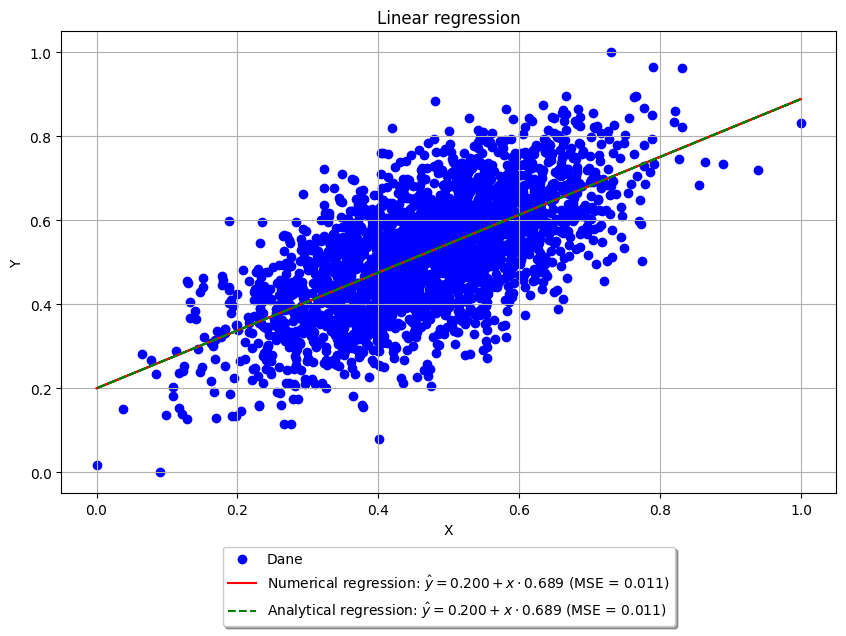

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dane')
plt.plot(X, Y_pred, color='red', label=f'Numerical regression: $\\hat y ={beta_anl[0]:.3f}+x\\cdot{beta_anl[1]:.3f}$ (MSE = {MSE_anl:.3f})')
plt.plot(X, y_pred, color='green', linestyle='--', label=f'Analytical regression: $\\hat y ={beta_num[0]:.3f}+x\\cdot{beta_num[1]:.3f}$ (MSE = {MSE_num:.3f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Linear regression')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=1)
plt.grid(True)
plt.show()

As we can see, both methods produced the same result.  
The regression equations are identical, as well as the values of the **MSE** (mean squared error) function.  
We can conclude that the numerical method worked better in this case because it completed the task faster.
